In [106]:
import collections

import pandas
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as plt

In [107]:
!pwd

/Users/nurrizkyimani/DataspellProjects/flood-jsc-yli


In [108]:
from collections import defaultdict

rekap_yr_dict = defaultdict()

for yr in range(2013,2021):
    path = "dataset/data-rekapitulasi/data-rekapitulasi-kejadian-banjir-tahun-{}.csv".format(yr)
    data_rekap = pd.read_csv(path)
    rekap_yr_dict[yr] = data_rekap

In [109]:
rc : pd.DataFrame = rekap_yr_dict[2013]
len(rc.columns)

15

In [110]:
for yr in range(2013, 2021):
    rekap_yr : pd.DataFrame = rekap_yr_dict[yr]
    # print(len(rekap_yr.columns))
    # rekap_yr['tahun'] = yr

In [111]:
all_rekap = pd.concat(rekap_yr_dict)

In [112]:
all_rekap

bulan  kecamatan  kelurahan rata_rata_ketinggian_air lama_genangan  \
2013 0       1       35.0      124.0               10 - 400            15.0   
     1       2       15.0       34.0               10 - 175             8.0   
     2       3        5.0        9.0               10 - 250             2.0   
     3       4       10.0       16.0               10 - 100             4.0   
     4       5       10.0       16.0                0 - 160             3.0   
...        ...        ...        ...                      ...           ...   
2020 7       8       10.0       12.0             10 s.d 80 cm        1 hari   
     8       9       16.0       28.0            10 s.d 130 cm  1 s.d 2 hari   
     9      10       29.0       72.0            10 s.d 180 cm  1 s.d 2 hari   
     10     11       16.0       27.0             10 s.d 60 cm  1 s.d 2 hari   
     11     12        7.0        9.0             10 s.d 80 cm        1 hari   

         rw_terdampak kk_terdampak jiwa_terdampak  korban_meninggal  \
2013 0         2414.0     506164.0      1226487.0              38.0   
     1          207.0      19177.0        46865.0               0.0   
     2           68.0       9215.0        27020.0               0.0   
     3           66.0       6004.0        15060.0               0.0   
     4          139.0       4740.0        18481.0               0.0   
...               ...          ...            ...               ...   
2020 7           20.0            0              0               0.0   
     8           65.0          414           1300               0.0   
     9          170.0         1933           6250               0.0   
     10          54.0            0              0               0.0   
     11          18.0          250            827               0.0   

         korban_hilang  korban_luka_berat  korban_luka_ringan  \
2013 0             0.0                0.0                 0.0   
     1             0.0                0.0                 0.0   
     2             0.0                0.0                 0.0   
     3             0.0                0.0                 0.0   
     4             0.0                0.0                 0.0   
...                ...                ...                 ...   
2020 7             0.0                0.0                 0.0   
     8             0.0                0.0                 0.0   
     9             0.0                0.0                 0.0   
     10            0.0                0.0                 0.0   
     11            0.0                0.0                 0.0   

         jumlah_jiwa_pengungsi_tertinggi  jumlah_tempat_pengungsian  \
2013 0                           83554.0                     1115.0   
     1                             740.0                       21.0   
     2                            2406.0                       34.0   
     3                             318.0                        7.0   
     4                            1245.0                       42.0   
...                                  ...                        ...   
2020 7                               0.0                        0.0   
     8                             104.0                        5.0   
     9                             675.0                       12.0   
     10                              0.0                        0.0   
     11                              0.0                        0.0   

        jumlah_nilai_kerugian  
2013 0                      0  
     1                      0  
     2                      0  
     3                      0  
     4                      0  
...                       ...  
2020 7                    n.a  
     8                    n.a  
     9                    n.a  
     10                   n.a  
     11                   n.a  

[95 rows x 15 columns]

In [113]:
all_rekap.index[0][1]
len(all_rekap.columns)

15

In [114]:
all_rekap.reset_index(inplace=True)
# df = df.rename(columns = {'index':'new column name'})

In [115]:
all_rekap.drop('level_1', axis=1, inplace= True)

In [116]:
# all_rekap.rename({'level_0' : 'tahun'}, axis='columns')
all_rekap = all_rekap.rename(columns = {'level_0':'tahun'})

In [117]:
all_rekap.dtypes

tahun                                int64
bulan                                int64
kecamatan                          float64
kelurahan                          float64
rata_rata_ketinggian_air            object
lama_genangan                       object
rw_terdampak                       float64
kk_terdampak                        object
jiwa_terdampak                      object
korban_meninggal                   float64
korban_hilang                      float64
korban_luka_berat                  float64
korban_luka_ringan                 float64
jumlah_jiwa_pengungsi_tertinggi    float64
jumlah_tempat_pengungsian          float64
jumlah_nilai_kerugian               object
dtype: object

In [118]:
import numpy as np
all_rekap = all_rekap.fillna(0)

In [310]:
all_rekap

,tahun,bulan,kecamatan,kelurahan,rata_rata_ketinggian_air,lama_genangan,rw_terdampak,kk_terdampak,jiwa_terdampak,korban_meninggal,korban_hilang,korban_luka_berat,korban_luka_ringan,jumlah_jiwa_pengungsi_tertinggi,jumlah_tempat_pengungsian
0,2013,1,35,124,10 - 400,15.0,2414,506164.0,1226487.0,38,0,0,0,83554,1115
1,2013,2,15,34,10 - 175,8.0,207,19177.0,46865.0,0,0,0,0,740,21
2,2013,3,5,9,10 - 250,2.0,68,9215.0,27020.0,0,0,0,0,2406,34
3,2013,4,10,16,10 - 100,4.0,66,6004.0,15060.0,0,0,0,0,318,7
4,2013,5,10,16,0 - 160,3.0,139,4740.0,18481.0,0,0,0,0,1245,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,2020,8,10,12,10 s.d 80 cm,1 hari,20,0,0,0,0,0,0,0,0
91,2020,9,16,28,10 s.d 130 cm,1 s.d 2 hari,65,414,1300,0,0,0,0,104,5
92,2020,10,29,72,10 s.d 180 cm,1 s.d 2 hari,170,1933,6250,0,0,0,0,675,12
93,2020,11,16,27,10 s.d 60 cm,1 s.d 2 hari,54,0,0,0,0,0,0,0,0


In [120]:
all_rekap = all_rekap.astype({
    "kecamatan": int,
    "kelurahan": int,

})

# "rw_terdampak": int,
# "kk_terdampak":  int,
# "jiwa_terdampak":  int,
# "korban_meninggal":  int,
# "korban_hilang":  int,
# "korban_luka_ringan":  int,
# "korban_luka_berat":  int,
# "jumlah_jiwa_pengungsi_tertinggi":  int,
# "jumlah_nilai_kerugian":  int,
# "jumlah_tempat_pengungsian":  int,

all_rekap['rw_terdampak'] = all_rekap['rw_terdampak'].astype('int64')
all_rekap['korban_meninggal'] = all_rekap['korban_meninggal'].astype('int64')
all_rekap['korban_hilang']  = all_rekap['korban_hilang'].astype('int64')

In [121]:
# all_rekap.replace('n.a', 0)
# all_rekap['kk_terdampak'] = all_rekap['kk_terdampak'].fillna(0)
# all_rekap['kk_terdampak'].astype('int64')

all_rekap['jiwa_terdampak'] = all_rekap['jiwa_terdampak']

# all_rekap['jiwa_terdampak'].astype('int64')
# all_rekap


In [122]:
all_rekap.dtypes

tahun                                int64
bulan                                int64
kecamatan                            int64
kelurahan                            int64
rata_rata_ketinggian_air            object
lama_genangan                       object
rw_terdampak                         int64
kk_terdampak                        object
jiwa_terdampak                      object
korban_meninggal                     int64
korban_hilang                        int64
korban_luka_berat                  float64
korban_luka_ringan                 float64
jumlah_jiwa_pengungsi_tertinggi    float64
jumlah_tempat_pengungsian          float64
jumlah_nilai_kerugian               object
dtype: object

In [123]:
all_rekap.drop('jumlah_nilai_kerugian', axis=1, inplace= True)

In [124]:
all_rekap['jumlah_tempat_pengungsian']  = all_rekap['jumlah_tempat_pengungsian'].astype('int64')
all_rekap['jumlah_jiwa_pengungsi_tertinggi']  = all_rekap['jumlah_jiwa_pengungsi_tertinggi'].astype('int64')
all_rekap['korban_luka_ringan']  = all_rekap['korban_luka_ringan'].astype('int64')
all_rekap['korban_luka_berat']  = all_rekap['korban_luka_berat'].astype('int64')

In [125]:
all_rekap.dtypes

tahun                               int64
bulan                               int64
kecamatan                           int64
kelurahan                           int64
rata_rata_ketinggian_air           object
lama_genangan                      object
rw_terdampak                        int64
kk_terdampak                       object
jiwa_terdampak                     object
korban_meninggal                    int64
korban_hilang                       int64
korban_luka_berat                   int64
korban_luka_ringan                  int64
jumlah_jiwa_pengungsi_tertinggi     int64
jumlah_tempat_pengungsian           int64
dtype: object

In [126]:
df_2020= all_rekap[all_rekap['tahun'] == 2020]

In [127]:
df_2020

,tahun,bulan,kecamatan,kelurahan,rata_rata_ketinggian_air,lama_genangan,rw_terdampak,kk_terdampak,jiwa_terdampak,korban_meninggal,korban_hilang,korban_luka_berat,korban_luka_ringan,jumlah_jiwa_pengungsi_tertinggi,jumlah_tempat_pengungsian
83,2020,1,35,151,10 s.d 350 cm,4 hari,390,22148,83406,19,0,0,0,36445,269
84,2020,2,42,167,5 s.d 200 cm,1 s.d 2 hari,581,12551,43464,6,0,0,0,13808,119
85,2020,3,24,46,5 s.d 160 cm,1 s.d 2 hari,104,3057,9687,0,0,0,0,453,14
86,2020,4,21,50,10 s.d 130 cm,1 s.d 2 hari,106,1059,2966,0,0,0,0,75,2
87,2020,5,12,23,10 s.d 200 cm,1 s.d 2 hari,47,891,3117,0,0,0,0,213,6
88,2020,6,9,16,5 s.d 120 cm,1 hari,46,80,320,0,0,0,0,320,7
89,2020,7,2,2,20 s.d 50 cm,1 hari,4,0,0,0,0,0,0,0,0
90,2020,8,10,12,10 s.d 80 cm,1 hari,20,0,0,0,0,0,0,0,0
91,2020,9,16,28,10 s.d 130 cm,1 s.d 2 hari,65,414,1300,0,0,0,0,104,5
92,2020,10,29,72,10 s.d 180 cm,1 s.d 2 hari,170,1933,6250,0,0,0,0,675,12


In [128]:
test = np.random.standard_normal(50).cumsum()

print(len(test))
print(test)

50
[-0.48036035 -0.44473261  0.15378982  0.20698774 -0.0288093  -0.21121529
 -2.22557462 -1.94975484 -2.30879343 -2.22767935 -3.54734853 -3.89070635
 -4.7163174  -5.48746982 -5.99855567 -6.09516897 -6.51031731 -5.54824983
 -3.26047554 -2.29022767 -2.85472011 -2.43460296 -2.61902005 -1.87001097
  0.01956792  0.97227355  1.68545686  1.47026389  1.61808793  2.89854608
  3.73509238  2.305529    1.05119186  2.22362797  2.88476721  5.65963635
  5.09330078  6.31933877  7.41585177  7.98545994  8.05208882  8.31330888
  9.58460522  8.12986767  9.08622427  8.08221542  7.51034231  4.94582983
  5.03248073  5.84786272]


In [129]:
df_2020_rw = df_2020['rw_terdampak']
df_2020_bulan = df_2020['bulan']

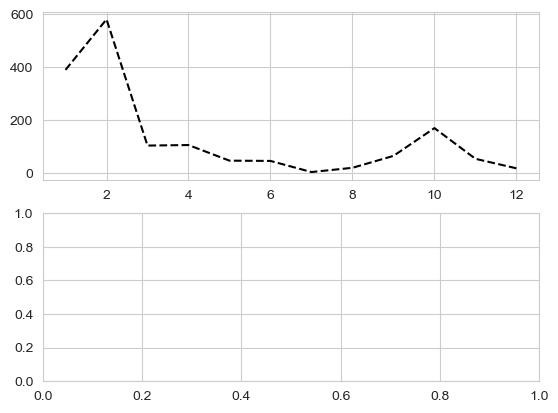

In [130]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(2,1, 1)
ax2 = fig.add_subplot(2, 1, 2)
# ax3 = fig.add_subplot(2, 2, 3)

ax1.plot(df_2020_bulan,df_2020_rw,  color="black", linestyle="dashed")
ax1.plot()

ax2

In [131]:
ax.plot(x, y, linestyle="--", color="green")

NameError: name 'ax' is not defined

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(df_2020_bulan, df_2020_rw, color="black",linestyle="dashed", label="rw_terdampak");

df_2020_kk = df_2020['kk_terdampak']
ax1 = fig.add_subplot()
ax1.plot(df_2020_bulan, df_2020_kk, color="black",linestyle="solid", label="kk_terdampak");

ax.legend()

In [ ]:
!conda install seaborn -y

In [ ]:
# df_2020_kk = df_2020['kk_terdampak']
# ax1 = fig.add_subplot()
# ax1.plot(df_2020_bulan, df_2020_kk, color="black",linestyle="solid", label="kk_terdampak");

import seaborn as sns
sns.lineplot(df_2020_bulan, df_2020_kk)

In [ ]:
sns.lineplot(df_2020_bulan, df_2020_rw)

In [ ]:
import matplotlib.pyplot as plt

all_rekap['kk_terdampak'] = all_rekap['kk_terdampak'].

df_2020 = all_rekap[all_rekap['tahun'] == 2020]
df_2019 = all_rekap[all_rekap['tahun'] == 2019]
df_2018 = all_rekap[all_rekap['tahun'] == 2018]
df_2017 = all_rekap[all_rekap['tahun'] == 2017]

plt.plot(df_2020['bulan'], df_2020['kk_terdampak'], label = "2020")
plt.plot(df_2020['bulan'], df_2019['kk_terdampak'], label = "2019")
plt.plot(df_2020['bulan'], df_2018['kk_terdampak'], label = "2018")
plt.plot(df_2020['bulan'], df_2017['kk_terdampak'], label = "2017")
plt.title("KK Terdampak tahun 2017-2020")
# plt.plot(y, x, label = "line 2")
plt.legend()
plt.show()

In [ ]:
all_rekap['lama_genangan'] = all_rekap['lama_genangan'].replace('1 s.d 2 hari', 2)
all_rekap['lama_genangan'] = all_rekap['lama_genangan'].replace('1 s/d 6', 6)
all_rekap['lama_genangan'] = all_rekap['lama_genangan'].replace('2 hari', 2)
all_rekap['lama_genangan'] = all_rekap['lama_genangan'].replace('1 hari', 1)
all_rekap['lama_genangan'] = all_rekap['lama_genangan'].replace('4 hari', 4)
all_rekap['lama_genangan'] = all_rekap['lama_genangan'].replace('1 s/d 2', 2)

all_rekap['lama_genangan'] = all_rekap['lama_genangan'].replace('1 s/d 2', 2)
all_rekap['lama_genangan'] = all_rekap['lama_genangan'].replace('1 s/d 6', 6)


all_rekap['lama_genangan'].iloc[59] = 2
all_rekap['lama_genangan'].iloc[60] = 6

all_rekap['lama_genangan'] = all_rekap['lama_genangan'].astype(int)

In [ ]:
import matplotlib.pyplot as plt

df_2020 = all_rekap[all_rekap['tahun'] == 2020]
df_2019 = all_rekap[all_rekap['tahun'] == 2019]
df_2018 = all_rekap[all_rekap['tahun'] == 2018]
df_2017 = all_rekap[all_rekap['tahun'] == 2017]

plt.plot(df_2020['bulan'], df_2020['lama_genangan'], label = "2020")
plt.plot(df_2020['bulan'], df_2019['lama_genangan'], label = "2019")
plt.plot(df_2020['bulan'], df_2018['lama_genangan'], label = "2018")
plt.plot(df_2020['bulan'], df_2017['lama_genangan'], label = "2017")
plt.title("lama tahun 2017-2020")
# plt.plot(y, x, label = "line 2")
plt.legend()
plt.show()

In [ ]:
all_rekap.columns

In [ ]:
all_rekap["rata_rata_ketinggian_air"]

In [ ]:
all_rekap

# Data Kejadian

In [132]:
path = "dataset/data-kejadian-banjir/data-kejadian-bencana-banjir-di-provinsi-dki-jakarta-tahun-2020-bulan-januari.csv"
data_kejadian = pd.read_csv(path)

In [133]:
data_kejadian

,kota_administrasi,kecamatan,kelurahan,rw,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,ketinggian_air,tanggal_kejadian,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian
0,Jakarta Pusat,JOHAR BARU,JOHAR BARU,"RW 01, 02, 06, 08",4,4,35,140,10 s/d 30 cm,tgl. 01 Januari,0,0,0,0,140,1,0,0
1,Jakarta Pusat,KEMAYORAN,GUNUNG SAHARI SELATAN,"RW 01, 02, 07, 08",4,4,0,0,10 s/d 70 cm,tgl. 01 Januari,0,0,0,0,0,0,0,0
2,Jakarta Pusat,KEMAYORAN,SERDANG,"RW 01, 02, 06, 07",4,4,0,0,10 s/d 30 cm,tgl. 01 Januari,1,0,0,0,0,0,0,0
3,Jakarta Pusat,SAWAH BESAR,PASAR BARU,"RW 02, 03, 04, 05, 06, 07, 08",7,7,155,625,10 s/d 70 cm,tgl. 01 Januari,0,0,0,0,625,5,0,0
4,Jakarta Pusat,TANAH ABANG,BENDUNGAN HILIR,"RW 07, 09",2,2,52,195,31 s/d 70 cm,tgl. 01 Januari,0,0,0,0,195,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Jakarta Timur,PASAR REBO,PEKAYON,"RW 02, 08",2,2,0,0,10 s/d 30 cm,tgl. 01 Januari,0,0,0,0,0,0,0,0
146,Jakarta Timur,PASAR REBO,GEDONG,"RW. 01, 03, 11",3,3,25,100,100 s/d 150 cm,tgl. 01 Januari,0,0,0,0,100,1,0,0
147,Jakarta Timur,PULOGADUNG,CIPINANG,"RW 01, 07, 12, 13, 14, 15, 16",7,29,1099,2700,31 s/d 70 cm,tgl. 01 Januari,0,0,0,0,0,0,0,0
148,Jakarta Timur,PULOGADUNG,JATI,RW 08,1,2,21,84,31 s/d 70 cm,tgl. 01 Januari,0,0,0,0,0,0,0,0


In [134]:
data_kejadian.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   kota_administrasi           150 non-null    object
 1   kecamatan                   150 non-null    object
 2   kelurahan                   150 non-null    object
 3   rw                          150 non-null    object
 4   jumlah_terdampak_rw         150 non-null    int64 
 5   jumlah_terdampak_rt         150 non-null    int64 
 6   jumlah_terdampak_kk         150 non-null    int64 
 7   jumlah_terdampak_jiwa       150 non-null    int64 
 8   ketinggian_air              150 non-null    object
 9   tanggal_kejadian            150 non-null    object
 10  lama_genangan               150 non-null    int64 
 11  jumlah_meninggal            150 non-null    int64 
 12  jumlah_hilang               150 non-null    int64 
 13  jumlah_luka_berat           150 non-null    int64 

In [135]:
data_kejadian.describe()

,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.0,150.0,150.0,150.000000,150.000000,150.0,150.0
mean,4.340000,6.693333,147.300000,553.960000,0.086667,0.0,0.0,0.0,481.666667,3.173333,0.0,0.0
std,2.976034,7.268528,240.698696,881.477846,0.305139,0.0,0.0,0.0,764.574380,4.346945,0.0,0.0
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
25%,2.000000,2.000000,4.250000,17.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
50%,4.000000,5.000000,51.000000,192.500000,0.000000,0.0,0.0,0.0,150.000000,2.000000,0.0,0.0
75%,6.000000,7.000000,167.500000,693.750000,0.000000,0.0,0.0,0.0,572.000000,5.000000,0.0,0.0
max,15.000000,38.000000,1140.000000,4560.000000,2.000000,0.0,0.0,0.0,4461.000000,31.000000,0.0,0.0


In [136]:
dk_jaktim = data_kejadian[data_kejadian.kota_administrasi == "Jakarta Timur"]

In [137]:
dk_jaktim

,kota_administrasi,kecamatan,kelurahan,rw,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,ketinggian_air,tanggal_kejadian,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian
104,Jakarta Timur,CAKUNG,CAKUNG BARAT,"RW 01, 03, 06, 07, 08",5,7,212,850,31 s/d 150 cm,tgl. 01 Januari,0,0,0,0,850,3,0,0
105,Jakarta Timur,CAKUNG,CAKUNG TIMUR,"RW 01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 12",12,12,160,658,10 s/d 70 cm,tgl. 02 Januari,0,0,0,0,658,0,0,0
106,Jakarta Timur,CAKUNG,PENGGILINGAN,"RW 04, 06, 07",3,3,0,0,10 s/d 30 cm,tgl. 01 Januari,0,0,0,0,0,0,0,0
107,Jakarta Timur,CAKUNG,RAWA TERATE,"RW 04, 05",2,3,48,195,10 s/d 200 cm,"tgl. 01 , 23, 24 Januari",0,0,0,0,195,0,0,0
108,Jakarta Timur,CAKUNG,UJUNG MENTENG,RW 01,1,3,23,70,31 s/d 70 cm,tgl. 01 Januari,0,0,0,0,0,0,0,0
109,Jakarta Timur,CAKUNG,JATINEGARA,"RW. 02,03,05,06,07,09,010,12,13,14",10,10,38,150,10 s/d 30 cm,tgl. 01 Januari,0,0,0,0,150,0,0,0
110,Jakarta Timur,CIPAYUNG,BAMBU APUS,"RW 01, 02, 03, 05",4,9,12,48,31 s/d 150 cm,tgl. 01 Januari,0,0,0,0,48,2,0,0
111,Jakarta Timur,CIPAYUNG,CEGER,"RW 01,02,05",3,3,20,80,31 s/d 70 cm,tgl. 01 Januari,0,0,0,0,80,1,0,0
112,Jakarta Timur,CIPAYUNG,CIPAYUNG,"RW 03, 04, 06, 07",4,7,64,190,31 s/d 150 cm,tgl. 01 Januari,0,0,0,0,0,0,0,0
113,Jakarta Timur,CIPAYUNG,LUBANG BUAYA,"RW 03, 12",2,5,0,0,71 s/d 150 cm,tgl. 01 Januari,0,0,0,0,0,0,0,0


/Users/nurrizkyimani/.conda/envs/workspace/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


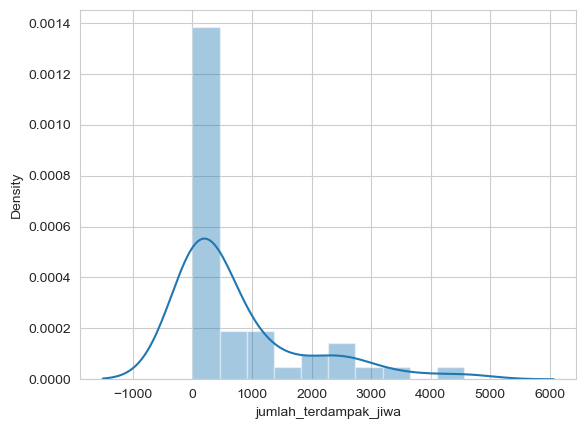

In [138]:
sns.distplot(dk_jaktim.jumlah_terdampak_jiwa)

In [139]:
dk_jaksel = data_kejadian[data_kejadian.kota_administrasi == "Jakarta Selatan"]

In [140]:
dk_jaksel

,kota_administrasi,kecamatan,kelurahan,rw,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,ketinggian_air,tanggal_kejadian,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian
55,Jakarta Selatan,CILANDAK,CILANDAK BARAT,"RW 02, 12",2,2,75,300,71 s/d180 cm,tgl. 01 Januari,0,0,0,0,300,2,0,0
56,Jakarta Selatan,CILANDAK,CIPETE SELATAN,RW 07,1,1,16,65,10 s/d 30 cm,tgl. 01 Januari,0,0,0,0,65,2,0,0
57,Jakarta Selatan,CILANDAK,LEBAK BULUS,"RW 04, 08",2,2,23,91,31 s/d 70 cm,"tgl. 01, 24, 26 Januari",0,0,0,0,91,1,0,0
58,Jakarta Selatan,CILANDAK,PONDOK LABU,"RW 01, 02, 03, 07, 09, 10",6,6,33,134,31 s/d 70 cm,"tgl. 01, 26 Januari",0,0,0,0,134,5,0,0
59,Jakarta Selatan,JAGAKARSA,JAGAKARSA,"RW 02, 04",2,2,87,235,31 s/d 70 cm,tgl. 01 Januari,0,0,0,0,235,1,0,0
60,Jakarta Selatan,JAGAKARSA,TANJUNG BARAT,"RW 01, 04, 05",3,3,0,0,31 s/d 70 cm,tgl. 01 Januari,0,0,0,0,0,0,0,0
61,Jakarta Selatan,JAGAKARSA,CIGANJUR,"RW. 01,05,06",3,5,37,150,30 s/d 100 cm,tgl. 01 Januari,0,0,0,0,150,3,0,0
62,Jakarta Selatan,JAGAKARSA,SRENGSENG SAWAH,RW.08,1,1,91,372,10 s/d 30 cm,tgl. 01 Januari,0,0,0,0,372,8,0,0
63,Jakarta Selatan,JAGAKARSA,LENTENG AGUNG,"RW. 01,02,03,07",4,4,122,507,10 s/d 30 cm,tgl. 01 Januari,0,0,0,0,507,4,0,0
64,Jakarta Selatan,JAGAKARSA,CIPEDAK,RW.01,1,1,43,175,10 s/d 30 cm,tgl. 01 Januari,0,0,0,0,175,1,0,0


In [141]:
dk_jaktim = data_kejadian[data_kejadian.kota_administrasi == "Jakarta Timur"]

In [142]:
dk_jaktim

,kota_administrasi,kecamatan,kelurahan,rw,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,ketinggian_air,tanggal_kejadian,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian
104,Jakarta Timur,CAKUNG,CAKUNG BARAT,"RW 01, 03, 06, 07, 08",5,7,212,850,31 s/d 150 cm,tgl. 01 Januari,0,0,0,0,850,3,0,0
105,Jakarta Timur,CAKUNG,CAKUNG TIMUR,"RW 01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 12",12,12,160,658,10 s/d 70 cm,tgl. 02 Januari,0,0,0,0,658,0,0,0
106,Jakarta Timur,CAKUNG,PENGGILINGAN,"RW 04, 06, 07",3,3,0,0,10 s/d 30 cm,tgl. 01 Januari,0,0,0,0,0,0,0,0
107,Jakarta Timur,CAKUNG,RAWA TERATE,"RW 04, 05",2,3,48,195,10 s/d 200 cm,"tgl. 01 , 23, 24 Januari",0,0,0,0,195,0,0,0
108,Jakarta Timur,CAKUNG,UJUNG MENTENG,RW 01,1,3,23,70,31 s/d 70 cm,tgl. 01 Januari,0,0,0,0,0,0,0,0
109,Jakarta Timur,CAKUNG,JATINEGARA,"RW. 02,03,05,06,07,09,010,12,13,14",10,10,38,150,10 s/d 30 cm,tgl. 01 Januari,0,0,0,0,150,0,0,0
110,Jakarta Timur,CIPAYUNG,BAMBU APUS,"RW 01, 02, 03, 05",4,9,12,48,31 s/d 150 cm,tgl. 01 Januari,0,0,0,0,48,2,0,0
111,Jakarta Timur,CIPAYUNG,CEGER,"RW 01,02,05",3,3,20,80,31 s/d 70 cm,tgl. 01 Januari,0,0,0,0,80,1,0,0
112,Jakarta Timur,CIPAYUNG,CIPAYUNG,"RW 03, 04, 06, 07",4,7,64,190,31 s/d 150 cm,tgl. 01 Januari,0,0,0,0,0,0,0,0
113,Jakarta Timur,CIPAYUNG,LUBANG BUAYA,"RW 03, 12",2,5,0,0,71 s/d 150 cm,tgl. 01 Januari,0,0,0,0,0,0,0,0


In [143]:
dk_jaktim['max_tinggi_air']  = dk_jaktim.ketinggian_air.str.extract(r'(\d+)\scm')

/var/folders/1n/2gdy6g815s301ygx2s35p6_80000gp/T/ipykernel_51926/591480147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dk_jaktim['max_tinggi_air']  = dk_jaktim.ketinggian_air.str.extract(r'(\d+)\scm')


In [144]:
dk_jaktim.max_tinggi_air

104    150
105     70
106     30
107    200
108     70
109     30
110    150
111     70
112    150
113    150
114    150
115     70
116    150
117    200
118     70
119    150
120    150
121    150
122    170
123     30
124    200
125    150
126    150
127    350
128     70
129    150
130    150
131    200
132    200
133    150
134    150
135    150
136    220
137    150
138     70
139    150
140     70
141    150
142     70
143     70
144     70
145     30
146    150
147     70
148     70
149    150
Name: max_tinggi_air, dtype: object

In [145]:
dk_jaktim['min_tinggi_air']  = dk_jaktim.ketinggian_air.str.extract(r'(\d+)\ss/d')

/var/folders/1n/2gdy6g815s301ygx2s35p6_80000gp/T/ipykernel_51926/3171481704.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dk_jaktim['min_tinggi_air']  = dk_jaktim.ketinggian_air.str.extract(r'(\d+)\ss/d')


In [146]:
dk_jaktim

,kota_administrasi,kecamatan,kelurahan,rw,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,ketinggian_air,tanggal_kejadian,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian,max_tinggi_air,min_tinggi_air
104,Jakarta Timur,CAKUNG,CAKUNG BARAT,"RW 01, 03, 06, 07, 08",5,7,212,850,31 s/d 150 cm,tgl. 01 Januari,0,0,0,0,850,3,0,0,150,31
105,Jakarta Timur,CAKUNG,CAKUNG TIMUR,"RW 01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 12",12,12,160,658,10 s/d 70 cm,tgl. 02 Januari,0,0,0,0,658,0,0,0,70,10
106,Jakarta Timur,CAKUNG,PENGGILINGAN,"RW 04, 06, 07",3,3,0,0,10 s/d 30 cm,tgl. 01 Januari,0,0,0,0,0,0,0,0,30,10
107,Jakarta Timur,CAKUNG,RAWA TERATE,"RW 04, 05",2,3,48,195,10 s/d 200 cm,"tgl. 01 , 23, 24 Januari",0,0,0,0,195,0,0,0,200,10
108,Jakarta Timur,CAKUNG,UJUNG MENTENG,RW 01,1,3,23,70,31 s/d 70 cm,tgl. 01 Januari,0,0,0,0,0,0,0,0,70,31
109,Jakarta Timur,CAKUNG,JATINEGARA,"RW. 02,03,05,06,07,09,010,12,13,14",10,10,38,150,10 s/d 30 cm,tgl. 01 Januari,0,0,0,0,150,0,0,0,30,10
110,Jakarta Timur,CIPAYUNG,BAMBU APUS,"RW 01, 02, 03, 05",4,9,12,48,31 s/d 150 cm,tgl. 01 Januari,0,0,0,0,48,2,0,0,150,31
111,Jakarta Timur,CIPAYUNG,CEGER,"RW 01,02,05",3,3,20,80,31 s/d 70 cm,tgl. 01 Januari,0,0,0,0,80,1,0,0,70,31
112,Jakarta Timur,CIPAYUNG,CIPAYUNG,"RW 03, 04, 06, 07",4,7,64,190,31 s/d 150 cm,tgl. 01 Januari,0,0,0,0,0,0,0,0,150,31
113,Jakarta Timur,CIPAYUNG,LUBANG BUAYA,"RW 03, 12",2,5,0,0,71 s/d 150 cm,tgl. 01 Januari,0,0,0,0,0,0,0,0,150,71


In [147]:
dk_jaktim_dt = dk_jaktim.drop(columns=['ketinggian_air'])

In [148]:
dk_jaktim_dt

,kota_administrasi,kecamatan,kelurahan,rw,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,tanggal_kejadian,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian,max_tinggi_air,min_tinggi_air
104,Jakarta Timur,CAKUNG,CAKUNG BARAT,"RW 01, 03, 06, 07, 08",5,7,212,850,tgl. 01 Januari,0,0,0,0,850,3,0,0,150,31
105,Jakarta Timur,CAKUNG,CAKUNG TIMUR,"RW 01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 12",12,12,160,658,tgl. 02 Januari,0,0,0,0,658,0,0,0,70,10
106,Jakarta Timur,CAKUNG,PENGGILINGAN,"RW 04, 06, 07",3,3,0,0,tgl. 01 Januari,0,0,0,0,0,0,0,0,30,10
107,Jakarta Timur,CAKUNG,RAWA TERATE,"RW 04, 05",2,3,48,195,"tgl. 01 , 23, 24 Januari",0,0,0,0,195,0,0,0,200,10
108,Jakarta Timur,CAKUNG,UJUNG MENTENG,RW 01,1,3,23,70,tgl. 01 Januari,0,0,0,0,0,0,0,0,70,31
109,Jakarta Timur,CAKUNG,JATINEGARA,"RW. 02,03,05,06,07,09,010,12,13,14",10,10,38,150,tgl. 01 Januari,0,0,0,0,150,0,0,0,30,10
110,Jakarta Timur,CIPAYUNG,BAMBU APUS,"RW 01, 02, 03, 05",4,9,12,48,tgl. 01 Januari,0,0,0,0,48,2,0,0,150,31
111,Jakarta Timur,CIPAYUNG,CEGER,"RW 01,02,05",3,3,20,80,tgl. 01 Januari,0,0,0,0,80,1,0,0,70,31
112,Jakarta Timur,CIPAYUNG,CIPAYUNG,"RW 03, 04, 06, 07",4,7,64,190,tgl. 01 Januari,0,0,0,0,0,0,0,0,150,31
113,Jakarta Timur,CIPAYUNG,LUBANG BUAYA,"RW 03, 12",2,5,0,0,tgl. 01 Januari,0,0,0,0,0,0,0,0,150,71


In [149]:
dk_jaktim_no_rw = dk_jaktim_dt.drop(columns='rw')

In [150]:
dk_jaktim_no_rw['lama_kejadian'] = dk_jaktim_no_rw.tanggal_kejadian.str.count(r'(\d+,*)')

In [151]:
dk_jaktim_no_rw

,kota_administrasi,kecamatan,kelurahan,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,tanggal_kejadian,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian,max_tinggi_air,min_tinggi_air,lama_kejadian
104,Jakarta Timur,CAKUNG,CAKUNG BARAT,5,7,212,850,tgl. 01 Januari,0,0,0,0,850,3,0,0,150,31,1
105,Jakarta Timur,CAKUNG,CAKUNG TIMUR,12,12,160,658,tgl. 02 Januari,0,0,0,0,658,0,0,0,70,10,1
106,Jakarta Timur,CAKUNG,PENGGILINGAN,3,3,0,0,tgl. 01 Januari,0,0,0,0,0,0,0,0,30,10,1
107,Jakarta Timur,CAKUNG,RAWA TERATE,2,3,48,195,"tgl. 01 , 23, 24 Januari",0,0,0,0,195,0,0,0,200,10,3
108,Jakarta Timur,CAKUNG,UJUNG MENTENG,1,3,23,70,tgl. 01 Januari,0,0,0,0,0,0,0,0,70,31,1
109,Jakarta Timur,CAKUNG,JATINEGARA,10,10,38,150,tgl. 01 Januari,0,0,0,0,150,0,0,0,30,10,1
110,Jakarta Timur,CIPAYUNG,BAMBU APUS,4,9,12,48,tgl. 01 Januari,0,0,0,0,48,2,0,0,150,31,1
111,Jakarta Timur,CIPAYUNG,CEGER,3,3,20,80,tgl. 01 Januari,0,0,0,0,80,1,0,0,70,31,1
112,Jakarta Timur,CIPAYUNG,CIPAYUNG,4,7,64,190,tgl. 01 Januari,0,0,0,0,0,0,0,0,150,31,1
113,Jakarta Timur,CIPAYUNG,LUBANG BUAYA,2,5,0,0,tgl. 01 Januari,0,0,0,0,0,0,0,0,150,71,1


In [152]:
# 1. Basic information about data - EDA
dk_jaktim_no_rw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 104 to 149
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   kota_administrasi           46 non-null     object
 1   kecamatan                   46 non-null     object
 2   kelurahan                   46 non-null     object
 3   jumlah_terdampak_rw         46 non-null     int64 
 4   jumlah_terdampak_rt         46 non-null     int64 
 5   jumlah_terdampak_kk         46 non-null     int64 
 6   jumlah_terdampak_jiwa       46 non-null     int64 
 7   tanggal_kejadian            46 non-null     object
 8   lama_genangan               46 non-null     int64 
 9   jumlah_meninggal            46 non-null     int64 
 10  jumlah_hilang               46 non-null     int64 
 11  jumlah_luka_berat           46 non-null     int64 
 12  jumlah_luka_ringan          46 non-null     int64 
 13  jumlah_pengungsi_tertinggi  46 non-null     int64

In [153]:
dk_jaktim_no_rw['max_tinggi_air'] = pd.to_numeric(dk_jaktim_no_rw['max_tinggi_air'])
dk_jaktim_no_rw['min_tinggi_air'] = pd.to_numeric(dk_jaktim_no_rw['min_tinggi_air'])


In [154]:
# 1. Basic information about data - EDA
dk_jaktim_no_rw.describe()

,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian,max_tinggi_air,min_tinggi_air,lama_kejadian
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.0,46.0,46.0,46.000000,46.000000,46.0,46.0,46.000000,46.000000,46.000000
mean,4.565217,9.956522,218.543478,751.260870,0.086957,0.0,0.0,0.0,519.173913,2.521739,0.0,0.0,128.695652,35.021739,1.326087
std,2.918540,9.251922,316.945330,1077.271274,0.354406,0.0,0.0,0.0,761.429191,3.132192,0.0,0.0,62.844029,23.977294,0.668476
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,30.000000,10.000000,1.000000
25%,2.000000,3.000000,21.500000,72.500000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,70.000000,10.000000,1.000000
50%,4.000000,7.000000,66.500000,220.000000,0.000000,0.0,0.0,0.0,140.000000,1.000000,0.0,0.0,150.000000,31.000000,1.000000
75%,6.000000,11.750000,306.750000,944.750000,0.000000,0.0,0.0,0.0,562.000000,3.750000,0.0,0.0,150.000000,31.000000,1.000000
max,12.000000,36.000000,1140.000000,4560.000000,2.000000,0.0,0.0,0.0,2738.000000,11.000000,0.0,0.0,350.000000,100.000000,4.000000


In [155]:
#Datatypes; Know the datatypes

dk_jaktim_no_rw.dtypes

kota_administrasi             object
kecamatan                     object
kelurahan                     object
jumlah_terdampak_rw            int64
jumlah_terdampak_rt            int64
jumlah_terdampak_kk            int64
jumlah_terdampak_jiwa          int64
tanggal_kejadian              object
lama_genangan                  int64
jumlah_meninggal               int64
jumlah_hilang                  int64
jumlah_luka_berat              int64
jumlah_luka_ringan             int64
jumlah_pengungsi_tertinggi     int64
jumlah_tempat_pengungsian      int64
nilai_kerugian                 int64
max_tinggi_air                 int64
min_tinggi_air                 int64
lama_kejadian                  int64
dtype: object

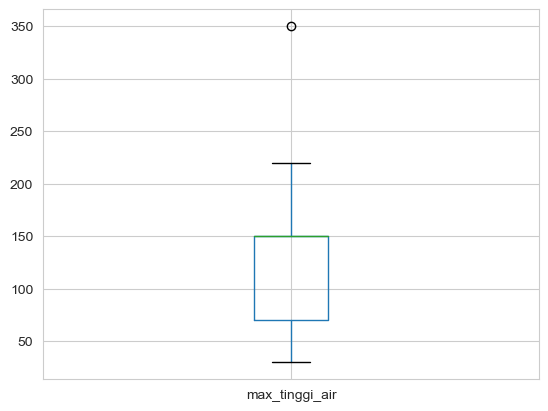

In [156]:
dk_jaktim_no_rw[['max_tinggi_air']].boxplot()

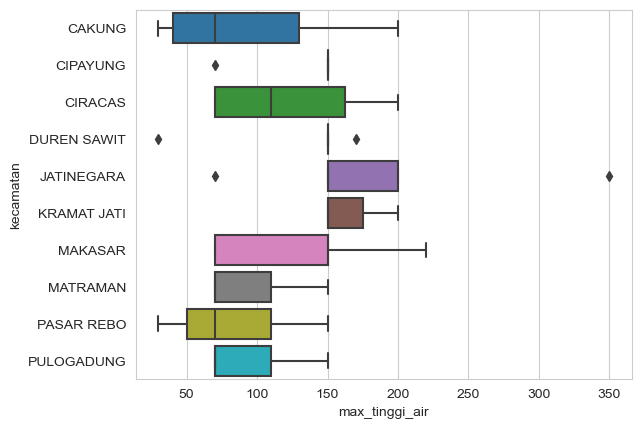

In [157]:
sns.boxplot(data=dk_jaktim_no_rw, x="max_tinggi_air", y="kecamatan")

In [158]:
dkj_jati = dk_jaktim_no_rw[dk_jaktim_no_rw["kecamatan"] == "JATINEGARA"]

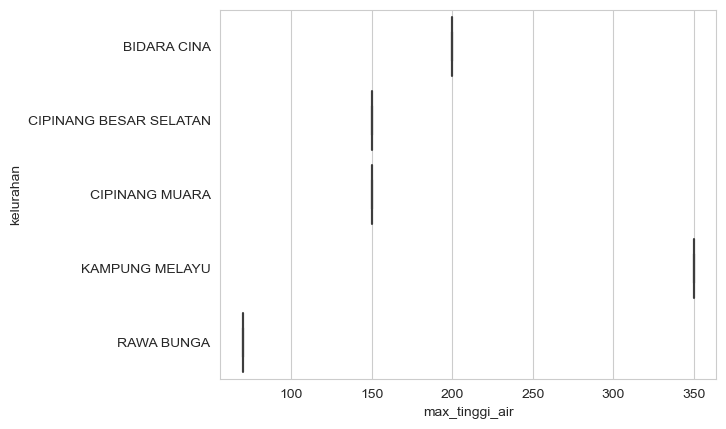

In [159]:
sns.boxplot(data=dkj_jati, x="max_tinggi_air", y="kelurahan")

In [160]:
dk_jaktim_no_rw.corr()

,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian,max_tinggi_air,min_tinggi_air,lama_kejadian
jumlah_terdampak_rw,1.000000,0.618166,0.338561,0.298490,0.187754,NaN,NaN,NaN,0.465397,0.236858,NaN,NaN,0.264602,-0.328216,0.302091
jumlah_terdampak_rt,0.618166,1.000000,0.687162,0.636767,0.028288,NaN,NaN,NaN,0.213518,0.408761,NaN,NaN,0.293430,-0.202347,0.225116
jumlah_terdampak_kk,0.338561,0.687162,1.000000,0.971379,0.136669,NaN,NaN,NaN,0.397812,0.423610,NaN,NaN,0.244080,-0.103953,0.377154
jumlah_terdampak_jiwa,0.298490,0.636767,0.971379,1.000000,0.169083,NaN,NaN,NaN,0.439536,0.451645,NaN,NaN,0.241728,-0.071143,0.410453
lama_genangan,0.187754,0.028288,0.136669,0.169083,1.000000,NaN,NaN,NaN,0.313197,0.158409,NaN,NaN,0.224711,-0.151902,0.440450
jumlah_meninggal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
jumlah_hilang,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
jumlah_luka_berat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
jumlah_luka_ringan,0.465397,0.213518,0.397812,0.439536,0.313197,NaN,NaN,NaN,1.000000,0.643610,NaN,NaN,0.528457,0.045424,0.601723
jumlah_pengungsi_tertinggi,0.236858,0.408761,0.423610,0.451645,0.158409,NaN,NaN,NaN,0.643610,1.000000,NaN,NaN,0.536399,0.195729,0.436994


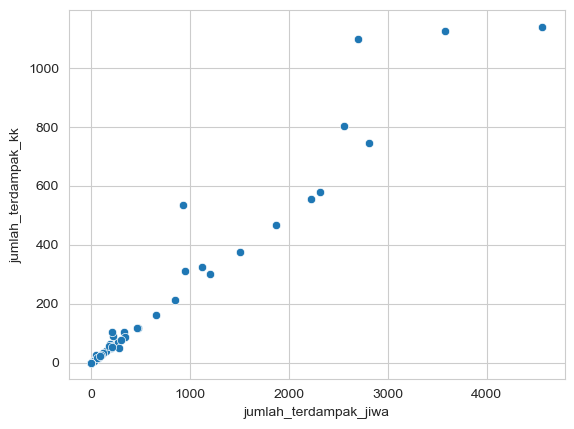

In [161]:
sns.scatterplot(data=dk_jaktim_no_rw, x="jumlah_terdampak_jiwa", y="jumlah_terdampak_kk")

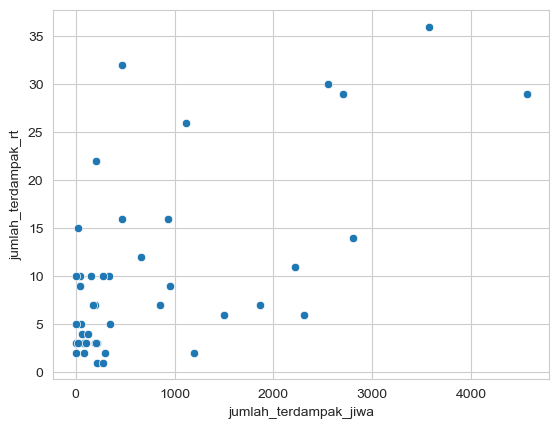

In [162]:
sns.scatterplot(data=dk_jaktim_no_rw, x="jumlah_terdampak_jiwa", y="jumlah_terdampak_rt")

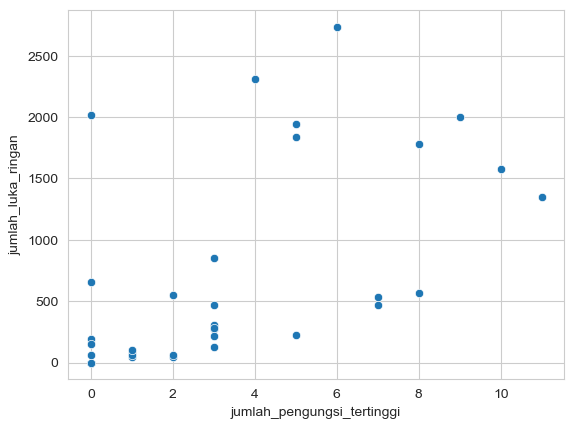

In [163]:
sns.scatterplot(data=dk_jaktim_no_rw, x="jumlah_pengungsi_tertinggi", y="jumlah_luka_ringan")

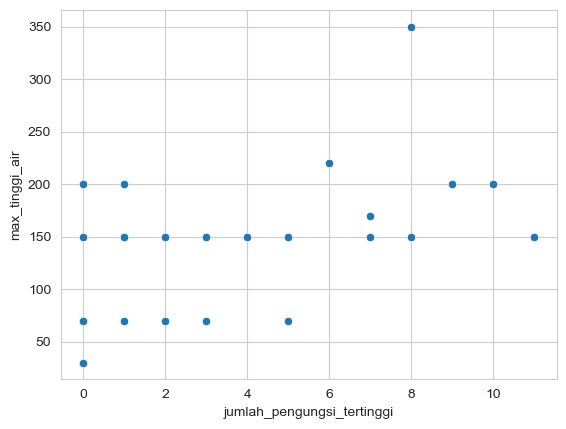

In [164]:
sns.scatterplot(data=dk_jaktim_no_rw, x="jumlah_pengungsi_tertinggi", y="max_tinggi_air")

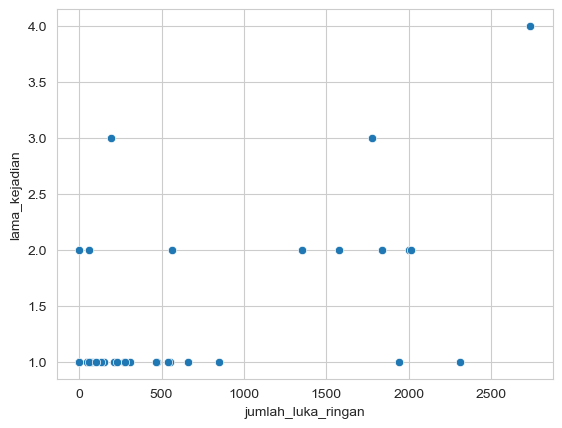

In [165]:
sns.scatterplot(data=dk_jaktim_no_rw, x="jumlah_luka_ringan", y="lama_kejadian")

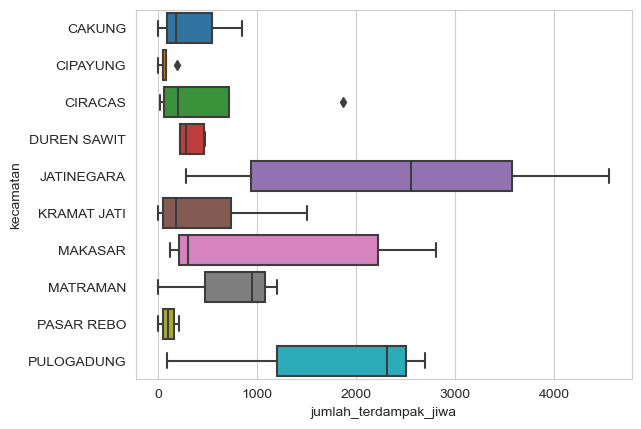

In [166]:
sns.boxplot(data=dk_jaktim_no_rw, x="jumlah_terdampak_jiwa", y="kecamatan")

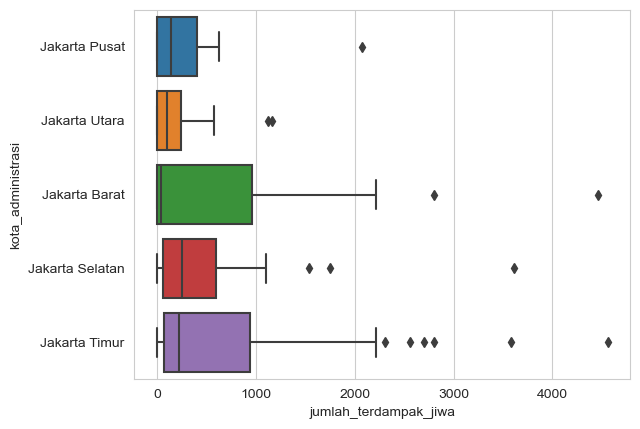

In [168]:
sns.boxplot(data=data_kejadian, x="jumlah_terdampak_jiwa", y="kota_administrasi")

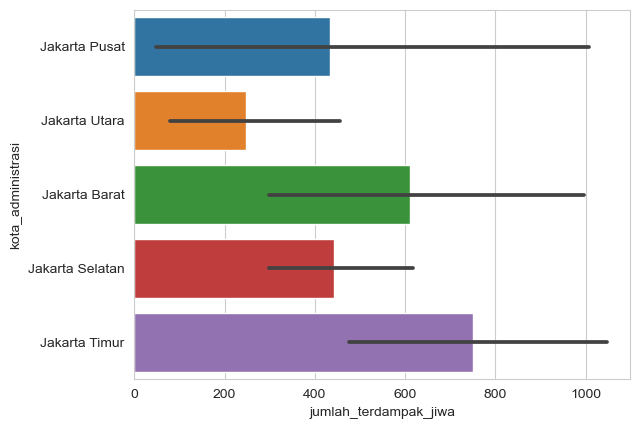

In [170]:
sns.barplot(data=data_kejadian, x="jumlah_terdampak_jiwa", y="kota_administrasi")

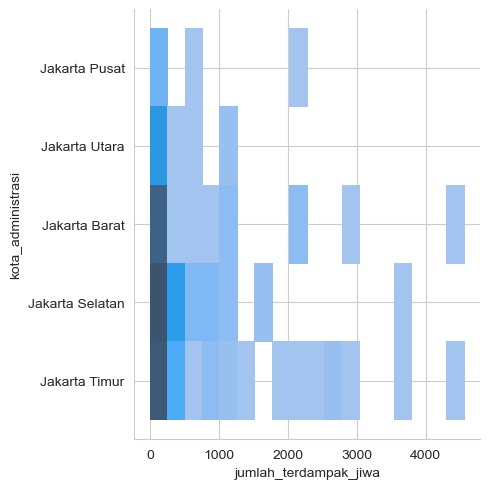

In [171]:
sns.displot(data=data_kejadian, x="jumlah_terdampak_jiwa", y="kota_administrasi")

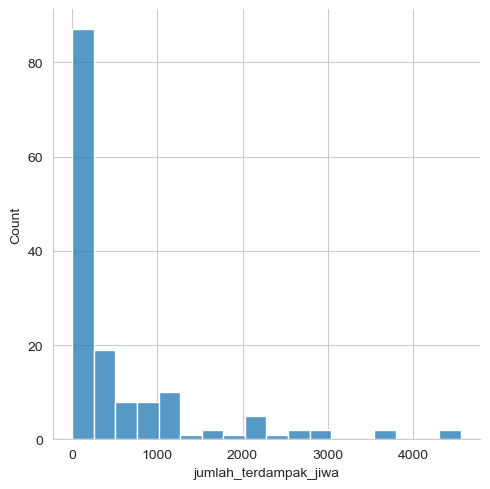

In [172]:
sns.displot(data=data_kejadian, x="jumlah_terdampak_jiwa")

In [173]:
dk_jaktim_no_rw

,kota_administrasi,kecamatan,kelurahan,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,tanggal_kejadian,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian,max_tinggi_air,min_tinggi_air,lama_kejadian
104,Jakarta Timur,CAKUNG,CAKUNG BARAT,5,7,212,850,tgl. 01 Januari,0,0,0,0,850,3,0,0,150,31,1
105,Jakarta Timur,CAKUNG,CAKUNG TIMUR,12,12,160,658,tgl. 02 Januari,0,0,0,0,658,0,0,0,70,10,1
106,Jakarta Timur,CAKUNG,PENGGILINGAN,3,3,0,0,tgl. 01 Januari,0,0,0,0,0,0,0,0,30,10,1
107,Jakarta Timur,CAKUNG,RAWA TERATE,2,3,48,195,"tgl. 01 , 23, 24 Januari",0,0,0,0,195,0,0,0,200,10,3
108,Jakarta Timur,CAKUNG,UJUNG MENTENG,1,3,23,70,tgl. 01 Januari,0,0,0,0,0,0,0,0,70,31,1
109,Jakarta Timur,CAKUNG,JATINEGARA,10,10,38,150,tgl. 01 Januari,0,0,0,0,150,0,0,0,30,10,1
110,Jakarta Timur,CIPAYUNG,BAMBU APUS,4,9,12,48,tgl. 01 Januari,0,0,0,0,48,2,0,0,150,31,1
111,Jakarta Timur,CIPAYUNG,CEGER,3,3,20,80,tgl. 01 Januari,0,0,0,0,80,1,0,0,70,31,1
112,Jakarta Timur,CIPAYUNG,CIPAYUNG,4,7,64,190,tgl. 01 Januari,0,0,0,0,0,0,0,0,150,31,1
113,Jakarta Timur,CIPAYUNG,LUBANG BUAYA,2,5,0,0,tgl. 01 Januari,0,0,0,0,0,0,0,0,150,71,1


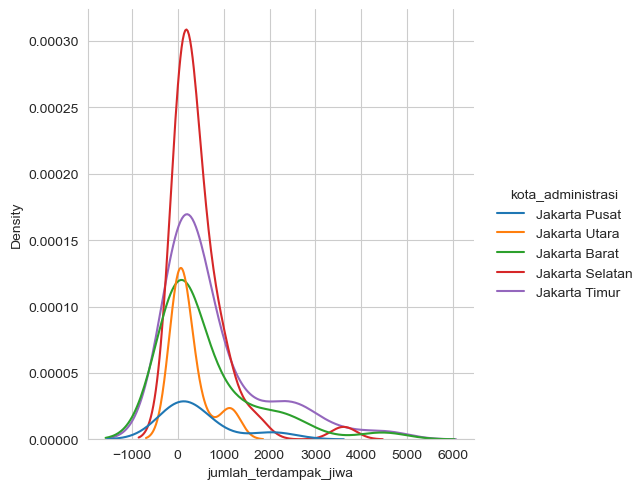

In [174]:
# sns.distplot(dk_jaktim_no_rw, x="jumlah_terdampak_jiwa")
sns.displot(data=data_kejadian, x="jumlah_terdampak_jiwa", hue="kota_administrasi", kind="kde")

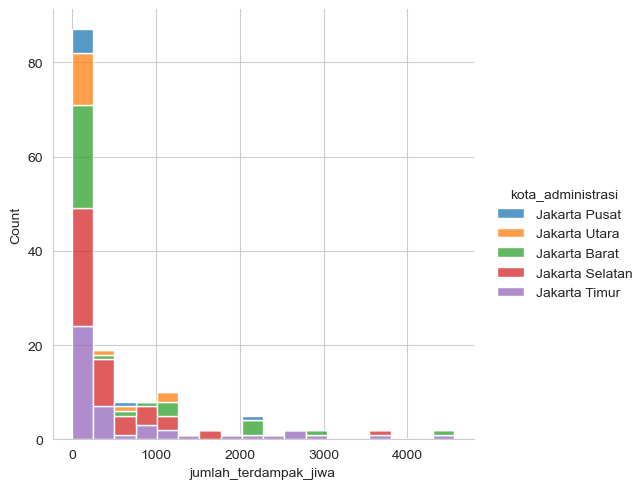

In [175]:
sns.displot(data=data_kejadian, x="jumlah_terdampak_jiwa", hue="kota_administrasi",multiple="stack")

In [176]:
data_kejadian.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   kota_administrasi           150 non-null    object
 1   kecamatan                   150 non-null    object
 2   kelurahan                   150 non-null    object
 3   rw                          150 non-null    object
 4   jumlah_terdampak_rw         150 non-null    int64 
 5   jumlah_terdampak_rt         150 non-null    int64 
 6   jumlah_terdampak_kk         150 non-null    int64 
 7   jumlah_terdampak_jiwa       150 non-null    int64 
 8   ketinggian_air              150 non-null    object
 9   tanggal_kejadian            150 non-null    object
 10  lama_genangan               150 non-null    int64 
 11  jumlah_meninggal            150 non-null    int64 
 12  jumlah_hilang               150 non-null    int64 
 13  jumlah_luka_berat           150 non-null    int64 

In [177]:
data_kejadian['max_tinggi_air']  = data_kejadian.ketinggian_air.str.extract(r'(\d+)\scm')
data_kejadian['min_tinggi_air']  = data_kejadian.ketinggian_air.str.extract(r'(\d+)\ss/d')
data_kejadian['lama_kejadian'] = data_kejadian.tanggal_kejadian.str.count(r'(\d+,*)')


data_kejadian['max_tinggi_air'] = pd.to_numeric(data_kejadian['max_tinggi_air'])
data_kejadian['min_tinggi_air'] = pd.to_numeric(data_kejadian['min_tinggi_air'])
data_kejadian['lama_kejadian'] = pd.to_numeric(data_kejadian['lama_kejadian'])


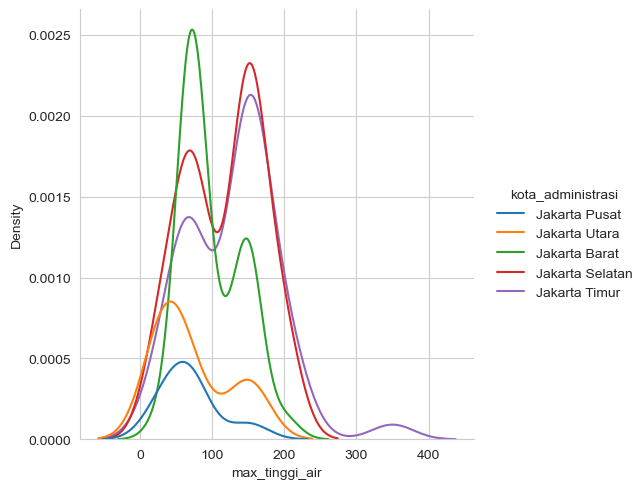

In [178]:
sns.displot(data=data_kejadian, x="max_tinggi_air", hue="kota_administrasi", kind="kde")

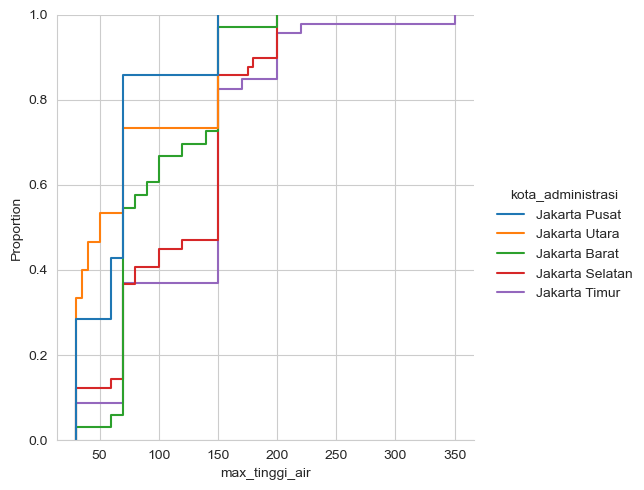

In [179]:
sns.displot(data=data_kejadian, x="max_tinggi_air", hue="kota_administrasi", kind="ecdf")

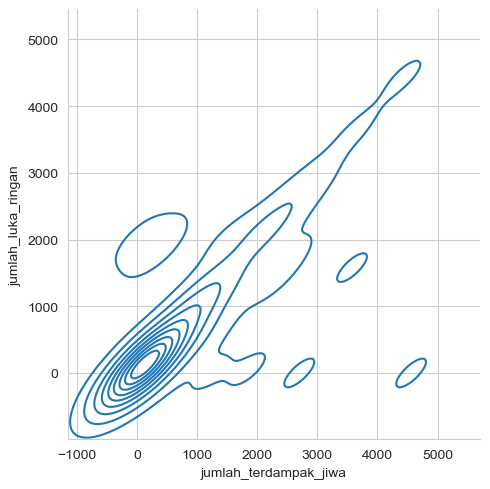

In [182]:
# jumlah_terdampak_jiwa jumlah_luka_ringan

sns.displot(data=data_kejadian, x="jumlah_terdampak_jiwa", y="jumlah_luka_ringan", kind="kde")

In [ ]:
sns.pairplot(data=data_kejadian, hue="kota_administrasi")

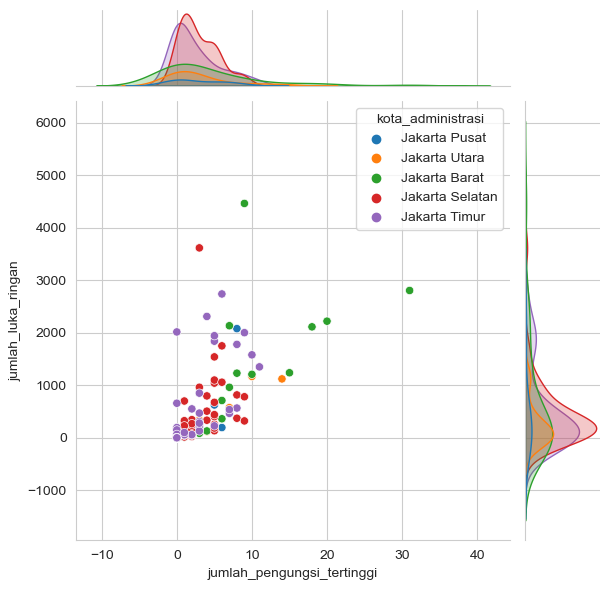

In [183]:
sns.jointplot(data=data_kejadian, x="jumlah_pengungsi_tertinggi", y="jumlah_luka_ringan", hue="kota_administrasi")

# Finding kecamatan with the highest jiwa terdampak

In [280]:
data_kejadian

,kota_administrasi,kecamatan,kelurahan,rw,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,ketinggian_air,tanggal_kejadian,...,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian,max_tinggi_air,min_tinggi_air,lama_kejadian
0,Jakarta Pusat,JOHAR BARU,JOHAR BARU,"RW 01, 02, 06, 08",4,4,35,140,10 s/d 30 cm,tgl. 01 Januari,...,0,0,0,140,1,0,0,30,10.0,1
1,Jakarta Pusat,KEMAYORAN,GUNUNG SAHARI SELATAN,"RW 01, 02, 07, 08",4,4,0,0,10 s/d 70 cm,tgl. 01 Januari,...,0,0,0,0,0,0,0,70,10.0,1
2,Jakarta Pusat,KEMAYORAN,SERDANG,"RW 01, 02, 06, 07",4,4,0,0,10 s/d 30 cm,tgl. 01 Januari,...,0,0,0,0,0,0,0,30,10.0,1
3,Jakarta Pusat,SAWAH BESAR,PASAR BARU,"RW 02, 03, 04, 05, 06, 07, 08",7,7,155,625,10 s/d 70 cm,tgl. 01 Januari,...,0,0,0,625,5,0,0,70,10.0,1
4,Jakarta Pusat,TANAH ABANG,BENDUNGAN HILIR,"RW 07, 09",2,2,52,195,31 s/d 70 cm,tgl. 01 Januari,...,0,0,0,195,6,0,0,70,31.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Jakarta Timur,PASAR REBO,PEKAYON,"RW 02, 08",2,2,0,0,10 s/d 30 cm,tgl. 01 Januari,...,0,0,0,0,0,0,0,30,10.0,1
146,Jakarta Timur,PASAR REBO,GEDONG,"RW. 01, 03, 11",3,3,25,100,100 s/d 150 cm,tgl. 01 Januari,...,0,0,0,100,1,0,0,150,100.0,1
147,Jakarta Timur,PULOGADUNG,CIPINANG,"RW 01, 07, 12, 13, 14, 15, 16",7,29,1099,2700,31 s/d 70 cm,tgl. 01 Januari,...,0,0,0,0,0,0,0,70,31.0,1
148,Jakarta Timur,PULOGADUNG,JATI,RW 08,1,2,21,84,31 s/d 70 cm,tgl. 01 Januari,...,0,0,0,0,0,0,0,70,31.0,1


In [283]:
data_kejadian_terdampak_kec_group = data_kejadian.groupby(['kecamatan'])['jumlah_terdampak_jiwa'].sum().nlargest(10)
data_kejadian_terdampak_kec_group
data_kejadian_terdampak_kec_group.index

Index(['CENGKARENG', 'JATINEGARA', 'PANCORAN', 'MAKASAR', 'PULOGADUNG',
       'MAMPANG PRAPATAN', 'KALIDERES', 'KRAMAT JATI', 'KEBAYORAN LAMA',
       'CIRACAS'],
      dtype='object', name='kecamatan')

In [284]:
data_kejadian_select = data_kejadian.loc[data_kejadian['kecamatan'].isin(data_kejadian_terdampak_kec_group.index)]
data_kejadian_terdampak_kec_mean = data_kejadian_select.groupby(['kecamatan'])['jumlah_terdampak_jiwa'].mean().nlargest(10)

In [285]:
data_kejadian_terdampak_kec_mean.index

Index(['JATINEGARA', 'CENGKARENG', 'PULOGADUNG', 'MAKASAR', 'PANCORAN',
       'MAMPANG PRAPATAN', 'KALIDERES', 'CIRACAS', 'KRAMAT JATI',
       'KEBAYORAN LAMA'],
      dtype='object', name='kecamatan')

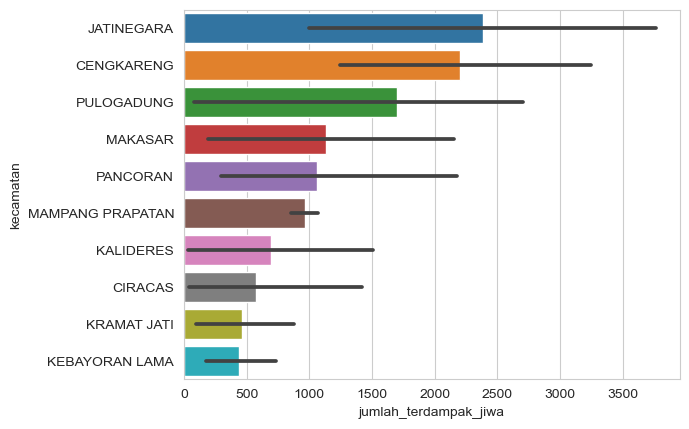

In [306]:
ax = sns.barplot(data=data_kejadian_select, x="jumlah_terdampak_jiwa", y='kecamatan', order=data_kejadian_terdampak_kec_mean.index)

## Based on Kelurahan

In [307]:
data_kejadian_kel_sort = data_kejadian_select.sort_values(by=["jumlah_terdampak_jiwa"], ascending=False).head(10)

In [308]:
data_kejadian_kel_sort

,kota_administrasi,kecamatan,kelurahan,rw,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,ketinggian_air,tanggal_kejadian,...,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian,max_tinggi_air,min_tinggi_air,lama_kejadian
128,Jakarta Timur,JATINEGARA,RAWA BUNGA,"RW 04, 05, 06",3,29,1140,4560,31 s/d 70 cm,tgl. 01 Januari,...,0,0,0,0,0,0,0,70,31.0,1
25,Jakarta Barat,CENGKARENG,KAPUK,"RW 02, 03, 04, 05, 06, 07, 08, 09, 10, 12, 13,...",13,13,1115,4461,31 s/d 70 cm,"tgl. 01, 24 Januari",...,0,0,0,4461,9,0,0,70,31.0,2
83,Jakarta Selatan,PANCORAN,KALIBATA,"RW 01, 04, 05, 06, 08, 09, 10",7,7,885,3615,31 s/d 200 cm,tgl. 01 Januari,...,0,0,0,3615,3,0,0,200,31.0,1
124,Jakarta Timur,JATINEGARA,BIDARA CINA,"RW 03, 04, 05, 06, 07, 11, 12, 14, 15, 16",10,36,1124,3577,31 s/d 200 cm,"tgl. 01, 09 Januari",...,0,0,0,1579,10,0,0,200,31.0,2
136,Jakarta Timur,MAKASAR,CIPINANG MELAYU,"RW 02, 03, 04, 05, 06, 08, 10,11, 12,13",10,14,745,2806,10 s/d 220 cm,"tgl. 01, 18, 20, 24 Januari",...,0,0,0,2738,6,0,0,220,10.0,4
26,Jakarta Barat,CENGKARENG,KEDAUNG KALI ANGKE,"RW 01, 02, 03, 04, 05, 06, 07, 08",8,8,701,2804,31 s/d 70 cm,tgl. 01 Januari,...,0,0,0,2804,31,0,0,70,31.0,1
147,Jakarta Timur,PULOGADUNG,CIPINANG,"RW 01, 07, 12, 13, 14, 15, 16",7,29,1099,2700,31 s/d 70 cm,tgl. 01 Januari,...,0,0,0,0,0,0,0,70,31.0,1
127,Jakarta Timur,JATINEGARA,KAMPUNG MELAYU,"RW 01, 02, 03, 04, 05, 06, 07, 08",8,30,802,2556,10 s/d 350 cm,"tgl. 01, 09, 18 Januari",...,0,0,0,1778,8,0,0,350,10.0,3
149,Jakarta Timur,PULOGADUNG,KAYU PUTIH,"RW 11, 12, 13, 14, 15, 16",6,6,577,2310,71 s/d 150 cm,tgl. 01 Januari,...,0,0,0,2310,4,0,0,150,71.0,1
139,Jakarta Timur,MAKASAR,MAKASAR,"RW 03, 05, 06, 07",4,11,556,2220,31 s/d 150 cm,"tgl. 01, 18 Januari",...,0,0,0,1350,11,0,0,150,31.0,2


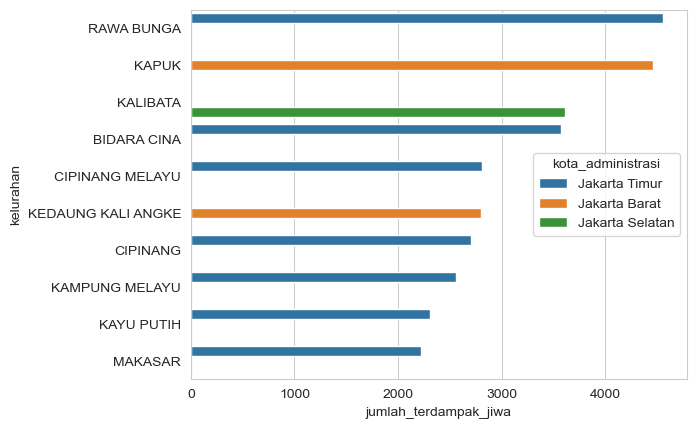

In [309]:
ax = sns.barplot(data=data_kejadian_kel_sort, x="jumlah_terdampak_jiwa", y='kelurahan', hue="kota_administrasi" )

In [332]:
all_rekap['rw_terdampak'] = all_rekap['rw_terdampak'].astype(int)


# Heatmap

In [335]:
all_rekap

,tahun,bulan,kecamatan,kelurahan,rata_rata_ketinggian_air,lama_genangan,rw_terdampak,kk_terdampak,jiwa_terdampak,korban_meninggal,korban_hilang,korban_luka_berat,korban_luka_ringan,jumlah_jiwa_pengungsi_tertinggi,jumlah_tempat_pengungsian
0,2013,1,35,124,10 - 400,15.0,2414,506164.0,1226487.0,38,0,0,0,83554,1115
1,2013,2,15,34,10 - 175,8.0,207,19177.0,46865.0,0,0,0,0,740,21
2,2013,3,5,9,10 - 250,2.0,68,9215.0,27020.0,0,0,0,0,2406,34
3,2013,4,10,16,10 - 100,4.0,66,6004.0,15060.0,0,0,0,0,318,7
4,2013,5,10,16,0 - 160,3.0,139,4740.0,18481.0,0,0,0,0,1245,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,2020,8,10,12,10 s.d 80 cm,1 hari,20,0,0,0,0,0,0,0,0
91,2020,9,16,28,10 s.d 130 cm,1 s.d 2 hari,65,414,1300,0,0,0,0,104,5
92,2020,10,29,72,10 s.d 180 cm,1 s.d 2 hari,170,1933,6250,0,0,0,0,675,12
93,2020,11,16,27,10 s.d 60 cm,1 s.d 2 hari,54,0,0,0,0,0,0,0,0


In [339]:
all_rekap = all_rekap[all_rekap.tahun != 2013]


# df = df[df.line_race != 0]
sdfd = all_rekap.pivot("bulan", "tahun", "rw_terdampak")

In [340]:
sdfd

tahun,2014,2015,2016,2017,2018,2019,2020
bulan,,,,,,,
1,634.0,221.0,26.0,7.0,25.0,58.0,390.0
2,192.0,615.0,231.0,216.0,162.0,43.0,581.0
3,89.0,30.0,93.0,95.0,21.0,119.0,104.0
4,11.0,18.0,134.0,78.0,19.0,94.0,106.0
5,16.0,7.0,26.0,48.0,47.0,15.0,47.0
6,7.0,0.0,49.0,17.0,18.0,0.0,46.0
7,41.0,0.0,59.0,22.0,0.0,0.0,4.0
8,21.0,0.0,82.0,13.0,0.0,0.0,20.0
9,0.0,0.0,72.0,2.0,0.0,0.0,65.0


ValueError: Unknown format code 's' for object of type 'float'

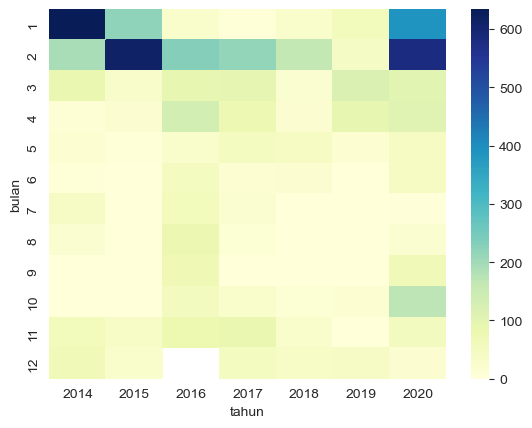

In [345]:
sns.heatmap(sdfd, annot=True, fmt="s",  cmap="YlGnBu")

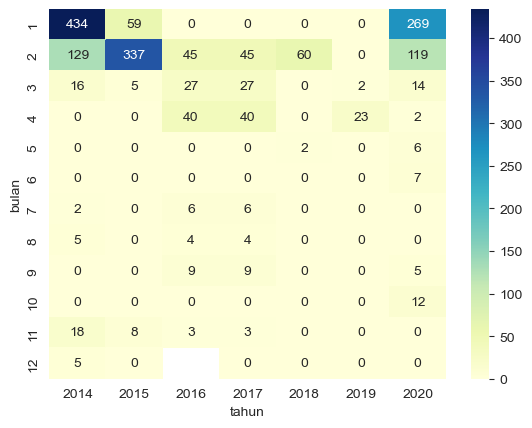

In [349]:
all_rekap = all_rekap[all_rekap.tahun != 2013]

# df = df[df.line_race != 0]
sdfd = all_rekap.pivot("bulan", "tahun", "jumlah_tempat_pengungsian")
sns.heatmap(sdfd, annot=True, fmt=".3g" , cmap="YlGnBu")

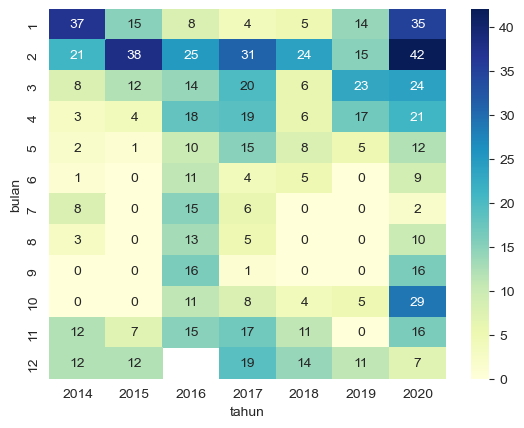

In [354]:
all_rekap = all_rekap[all_rekap.tahun != 2013]

# df = df[df.line_race != 0]
sdfd = all_rekap.pivot("bulan", "tahun", "kecamatan")
sns.heatmap(sdfd, annot=True, fmt=".3g" , cmap="YlGnBu")

In [356]:

all_rekap = all_rekap[all_rekap.tahun != 2013]

# df = df[df.line_race != 0]
sdfd = all_rekap.pivot("bulan", "tahun", "jiwa_terdampak")
sns.heatmap(sdfd, annot=True, fmt=".3g", cmap="YlGnBu")

ValueError: could not convert string to float: 'n.a'

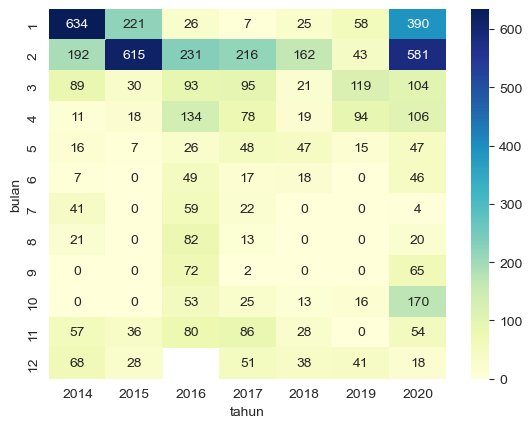

In [357]:

all_rekap = all_rekap[all_rekap.tahun != 2013]

# df = df[df.line_race != 0]
sdfd = all_rekap.pivot("bulan", "tahun", "rw_terdampak")
sns.heatmap(sdfd, annot=True, fmt=".3g", cmap="YlGnBu")

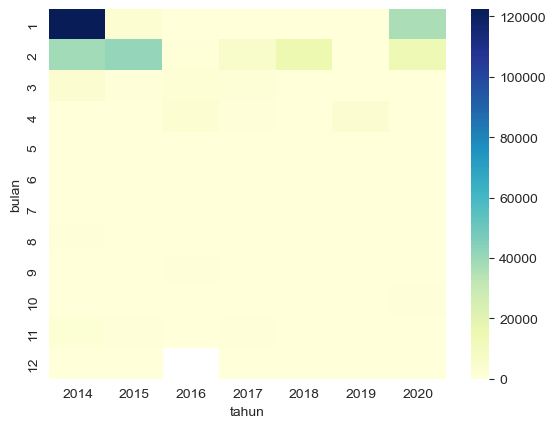

In [367]:

all_rekap = all_rekap[all_rekap.tahun != 2013]

# df = df[df.line_race != 0]
sdfd = all_rekap.pivot("bulan", "tahun", "jumlah_jiwa_pengungsi_tertinggi")
sns.heatmap(sdfd,  cmap="YlGnBu")

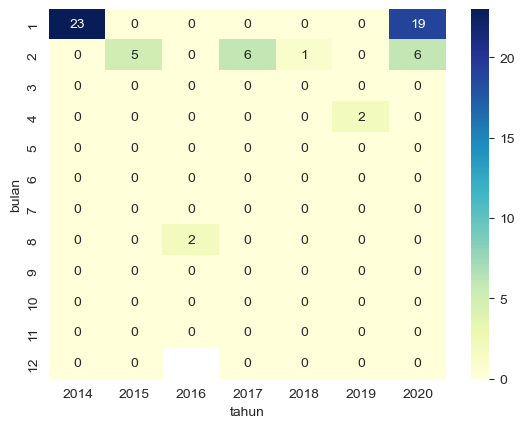

In [369]:
all_rekap = all_rekap[all_rekap.tahun != 2013]

# df = df[df.line_race != 0]
sdfd = all_rekap.pivot("bulan", "tahun", "korban_meninggal")
sns.heatmap(sdfd,  annot=True, fmt=".3g",  cmap="YlGnBu")

# Swarm Plot

In [371]:
data_kejadian

,kota_administrasi,kecamatan,kelurahan,rw,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,ketinggian_air,tanggal_kejadian,...,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian,max_tinggi_air,min_tinggi_air,lama_kejadian
0,Jakarta Pusat,JOHAR BARU,JOHAR BARU,"RW 01, 02, 06, 08",4,4,35,140,10 s/d 30 cm,tgl. 01 Januari,...,0,0,0,140,1,0,0,30,10.0,1
1,Jakarta Pusat,KEMAYORAN,GUNUNG SAHARI SELATAN,"RW 01, 02, 07, 08",4,4,0,0,10 s/d 70 cm,tgl. 01 Januari,...,0,0,0,0,0,0,0,70,10.0,1
2,Jakarta Pusat,KEMAYORAN,SERDANG,"RW 01, 02, 06, 07",4,4,0,0,10 s/d 30 cm,tgl. 01 Januari,...,0,0,0,0,0,0,0,30,10.0,1
3,Jakarta Pusat,SAWAH BESAR,PASAR BARU,"RW 02, 03, 04, 05, 06, 07, 08",7,7,155,625,10 s/d 70 cm,tgl. 01 Januari,...,0,0,0,625,5,0,0,70,10.0,1
4,Jakarta Pusat,TANAH ABANG,BENDUNGAN HILIR,"RW 07, 09",2,2,52,195,31 s/d 70 cm,tgl. 01 Januari,...,0,0,0,195,6,0,0,70,31.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Jakarta Timur,PASAR REBO,PEKAYON,"RW 02, 08",2,2,0,0,10 s/d 30 cm,tgl. 01 Januari,...,0,0,0,0,0,0,0,30,10.0,1
146,Jakarta Timur,PASAR REBO,GEDONG,"RW. 01, 03, 11",3,3,25,100,100 s/d 150 cm,tgl. 01 Januari,...,0,0,0,100,1,0,0,150,100.0,1
147,Jakarta Timur,PULOGADUNG,CIPINANG,"RW 01, 07, 12, 13, 14, 15, 16",7,29,1099,2700,31 s/d 70 cm,tgl. 01 Januari,...,0,0,0,0,0,0,0,70,31.0,1
148,Jakarta Timur,PULOGADUNG,JATI,RW 08,1,2,21,84,31 s/d 70 cm,tgl. 01 Januari,...,0,0,0,0,0,0,0,70,31.0,1


/Users/nurrizkyimani/.conda/envs/workspace/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 27.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


[Text(0, 0.5, '')]

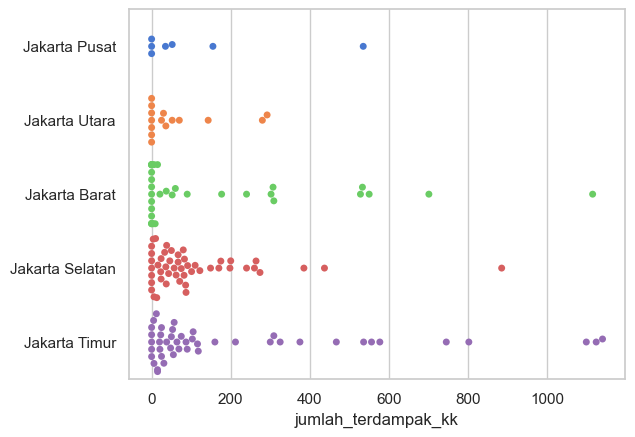

In [380]:
import seaborn as sns
sns.set_theme(style="whitegrid", palette="muted")

# Draw a categorical scatterplot to show each observation
ax = sns.swarmplot(data=data_kejadian, x="jumlah_terdampak_kk", y="kota_administrasi")
ax.set(ylabel="")